In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import calendar
import plotly.express as px
from tqdm import tqdm
import nbformat

In [2]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

#### In this small project i want to make analyzing using oop

**Let's start!**

In [3]:
df = pd.read_csv("Sample - Superstore.csv",encoding='cp1252') # <- Just reading file

In [4]:
dfinfo = pd.read_csv('Info.csv')

In [5]:
df.isna().sum() # We haven't any null here and we can continue work with this project

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


##### Let's make a simple functions for simplify works

Sometimes we have very big strings in our data.

And this one function will make it shorter to make plots more appeal

In [7]:
def cutter(x):
    if len(x)>20:
        x = x.split()
        x = f'{x[0]} {x[1]}'
    return x

Here we will search location of our cities

We will get longitude and lattitude

Anb afterward we will create map of the USA with all this points

In [8]:
geolocator = Nominatim(user_agent="user_agent")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1,max_retries=2,error_wait_seconds=3)
def get_coordinates(city):
    location = geocode(city + ", USA")
    try:
        return location.latitude, location.longitude
    except:
        print(location)
        return None, None

This function is creating my own beauty barplot and pie in one plot

In [9]:
def modern_barplot(df_,x,y,hue,title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6), dpi=100)

    sns.set_style('ticks')
    fig.patch.set_facecolor('#FBEAEB')
    ax1.set_facecolor('#CADCFC')
    dfcopy = df_.copy() # <- I don't want to touch main dataframe
    dfcopy.index = dfcopy.index.map(lambda name: cutter(name))
    sns.barplot(data = dfcopy,x=x,y=y,hue = hue, palette='Spectral',ax=ax1,width = 0.6)
    ax1.tick_params(axis='x',labelrotation=90,labelsize=15,color='#2F3C7E',labelcolor ='#2F3C7E')
    ax1.tick_params(axis='y',labelsize=15,color='#2F3C7E',labelcolor ='#2F3C7E')
    ax1.set_xlabel(x, fontweight='bold', size=23, color='#2F3C7E', labelpad=20)
    ax1.set_ylabel(y, fontweight='bold', size=23, color='#2F3C7E', labelpad=20)
    ax1.set_title(f'{title}', fontweight='bold',size = 25,pad=20)
    if hue!=x: # <- If we have we will add legend for better reading of our plot
        ax1.legend(title=hue, 
        title_fontsize='13', fontsize='12', loc='best')
    new_df = df_.copy() # <- I don't want to touch main dataframe
    rows_to_drop = [] # <- If we have negative data we will add indexes here and delete it latter
    thrash = [] # <- Here we will take all small features for adding they are in one feature(Other)
    for i in new_df.index:
        if new_df.loc[i, y].item() <= 0: # if we have less than 0 we will delete this data in pie
            rows_to_drop.append(i)
    new_df = new_df.drop(index=rows_to_drop)
    rows_to_drop = []
    for i in new_df.index: # if we have small data we will create new index (Other) and push them all here
        if new_df.loc[i,y].item() <= (new_df[y].sum()/33):
            rows_to_drop.append(i)
            thrash.append(i)
    new_df.index = new_df.index.map(lambda name: cutter(name)) # <- Just using our shorter
    if len(thrash) > 1: # <- if we have something for delete (more than one) we will delete.But if we have one it isn't necessary
        # because of we willn't shorter dataframe
        new_data = pd.DataFrame({ y: [new_df.loc[thrash].sum().item()]},
        index=pd.MultiIndex.from_tuples([('Other','')],names=['Category', 'Subcategory']))
        new_df = new_df.drop(index=rows_to_drop)
        new_df = pd.concat([new_df,new_data],ignore_index=False,join='inner')
    wedges, texts, autotexts = ax2.pie(new_df[y].apply(lambda x: 0 if x <=0 else int(x)),labels=new_df.index,
    autopct='%.0f%%',colors = sns.color_palette('Spectral')) # that's all only for my personal style
    for text in texts:
        text.set_color('#2F3C7E')
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_color('#2F3C7E')
        autotext.set_fontsize(12)
    ax2.set_title('Pie Chart', fontweight='bold', size=20, pad=20)
    plt.tight_layout()  
    plt.show()

In [88]:
class SampleSupestore(object):
   df = df # <- We can everytime check our data
   infodf = dfinfo# <- We can everytime check our explanation of data
   def region_sales(self,regions = 10,operator = 'sum' ):
      """
         regions(int): how much regions u want to see.Default to ten 
          operator (str, optional):[sum,mean]. Defaults to 'sum'.
      """
      if operator =='sum':
         df_sales = pd.DataFrame(df.groupby('City')['Sales'].sum().sort_values(ascending=False)[:regions])
         modern_barplot(df_sales,'City','Sales','City','Sales sum by regions')
      if operator =='mean':
         df_sales = pd.DataFrame(df.groupby('City')['Sales'].mean().sort_values(ascending=False)[:regions])
         modern_barplot(df_sales,'City','Sales','City','Sales mean by regions')
   def region_profit(self,regions = 10,operator = 'sum' ):
      """
         regions(int): how much regions u want to see.Default to ten 
          operator (str, optional):[sum,mean]. Defaults to 'sum'.
      """
      if operator =='sum':
         df_profit = pd.DataFrame(df.groupby('City')['Profit'].sum().sort_values(ascending=False)[:regions])
         modern_barplot(df_profit,'City','Profit','City','Profit sum by regions')
      if operator =='mean':
         df_profit = pd.DataFrame(df.groupby('City')['Profit'].mean().sort_values(ascending=False)[:regions])
         modern_barplot(df_profit,'City','Profit','City','Profit mean by regions')
   def most_popular_categories_profit(self,operator = 'sum'):
      """
      operator (str, optional):[sum,mean]. Defaults to 'sum'.
      """
      if operator =='sum':
         df_categories = pd.DataFrame(df.groupby(['Category','Sub-Category'])['Profit'].sum().sort_values(ascending=False)[:])
         modern_barplot(df_categories,'Sub-Category','Profit','Category','Category sum profit')
      if operator =='mean':
         df_categories = pd.DataFrame(df.groupby(['Category','Sub-Category'])['Profit'].mean().sort_values(ascending=False)[:])
         modern_barplot(df_categories,'Sub-Category','Profit','Category','Category mean profit') 
   def most_popular_categories_sales(self,operator = 'sum' ):
      """
      operator (str, optional):[sum,mean]. Defaults to 'sum'.
      """
      if operator =='sum':
         df_categories = pd.DataFrame(df.groupby(['Category','Sub-Category'])['Sales'].sum().sort_values(ascending=False)[:])
         modern_barplot(df_categories,'Sub-Category','Sales','Category','Category sum sales')
      if operator == 'mean':
         df_categories = pd.DataFrame(df.groupby(['Category','Sub-Category'])['Sales'].mean().sort_values(ascending=False)[:])
         modern_barplot(df_categories,'Sub-Category','Sales','Category','Category mean sales') 
   @property
   def top_month_sales(self):
      new_df = df.copy()
      new_df['Order Date'] = pd.to_datetime(df['Order Date'])
      new_df['month'] = new_df['Order Date'].apply(lambda x: x.month)
      month_df = pd.DataFrame(new_df.groupby('month')['Sales'].sum().sort_values(ascending=False))
      month_df.index = month_df.index.map(lambda x: calendar.month_name[x])
      modern_barplot(month_df,'month','Sales','month','top sales month')
   @property
   def top_month_profit(self):
      new_df = df.copy()
      new_df['Order Date'] = pd.to_datetime(df['Order Date'])
      new_df['month'] = new_df['Order Date'].apply(lambda x: x.month)
      month_df = pd.DataFrame(new_df.groupby('month')['Profit'].sum().sort_values(ascending=False))
      month_df.index = month_df.index.map(lambda x: calendar.month_name[x])
      modern_barplot(month_df,'month','Profit','month','top sales month')
   def top_customers(self,count=10):
      new_df = pd.DataFrame(df['Customer Name'].value_counts())
      new_df = new_df[:count]
      modern_barplot(new_df,'Customer Name','count','Customer Name','top customers by orders')
   def most_popular_products_sales(self,count=10):
      new_df = pd.DataFrame(df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False))
      df_sales = new_df[:count]
      modern_barplot(df_sales,'Product Name','Sales','Product Name','most popular product by sales')
   def most_popular_products_profit(self,count=10):
      new_df = pd.DataFrame(df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False))
      df_sales = new_df[:count]
      modern_barplot(df_sales,'Product Name','Profit','Product Name','most popular product by sales')
   @property
   def day_of_week_sales(self):
      new_df = df.copy()
      new_df['Order Date'] = pd.to_datetime(df['Order Date'])
      new_df['day_week'] = new_df['Order Date'].dt.day_name()
      new_df = pd.DataFrame(new_df.groupby('day_week')['Sales'].sum().sort_values(ascending=False))
      modern_barplot(new_df,'day_week','Sales','day_week','top days of sales')
   @property
   def day_of_week_profit(self):
      new_df = df.copy()
      new_df['Order Date'] = pd.to_datetime(df['Order Date'])
      new_df['day_week'] = new_df['Order Date'].dt.day_name()
      new_df = pd.DataFrame(new_df.groupby('day_week')['Profit'].sum().sort_values(ascending=False))
      modern_barplot(new_df,'day_week','Profit','day_week','top days of profits')
   @property
   def state_map(self):
      tqdm.pandas()
      df_sales = df.groupby('City')['Sales'].sum().reset_index()
      df_sales['Coordinates'] = df_sales['City'].progress_apply(get_coordinates)
      df_sales[['Latitude', 'Longitude']] = \
      pd.DataFrame(df_sales['Coordinates'].tolist(), index=df_sales.index)
      fig = px.scatter_mapbox(df_sales, 
                        lat="Latitude", 
                        lon="Longitude", 
                        size="Sales", 
                        color="Sales",
                        hover_name="City",
                        hover_data=["Sales"],
                        color_continuous_scale="Viridis",
                        size_max=15,
                        zoom=3,
                        mapbox_style="carto-positron",
                        title='Sales by City in the USA')
      fig.show()
   @property
   def plot_orders(self):
      df_for_scatter = df.groupby('Order Date')['Sales'].sum().reset_index().sort_values(by='Order Date', ascending=False)
      df_for_scatter['Order Date'] = df_for_scatter['Order Date'].apply(lambda x: pd.to_datetime(x))
      plt.figure(figsize=(10, 6), dpi=100)
      sns.set_style('ticks')
      fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
      fig.patch.set_facecolor('#FBEAEB')
      ax.set_facecolor('#CADCFC')
      sns.kdeplot(data=df_for_scatter, x='Order Date', bw_adjust=0.5, ax=ax)
      ax.tick_params(axis='x', labelsize=15, labelcolor='#2F3C7E', labelrotation=45)
      ax.tick_params(axis='y', labelsize=15, labelcolor='#2F3C7E')
      ax.set_xlabel('Order Date', fontweight='bold', size=23, color='#2F3C7E', labelpad=20)
      ax.set_ylabel('Density', fontweight='bold', size=23, color='#2F3C7E', labelpad=20)
      ax.set_title('Sales Density over Time', fontweight='bold', size=25, pad=20, color='#2F3C7E')
      plt.tight_layout()
      plt.show()
   @property
   def average_profit(self):
      print(df['Profit'].mean())
   @property
   def average_sales(self):
      print(df['Sales'].mean())

In [89]:
aa = SampleSupestore()

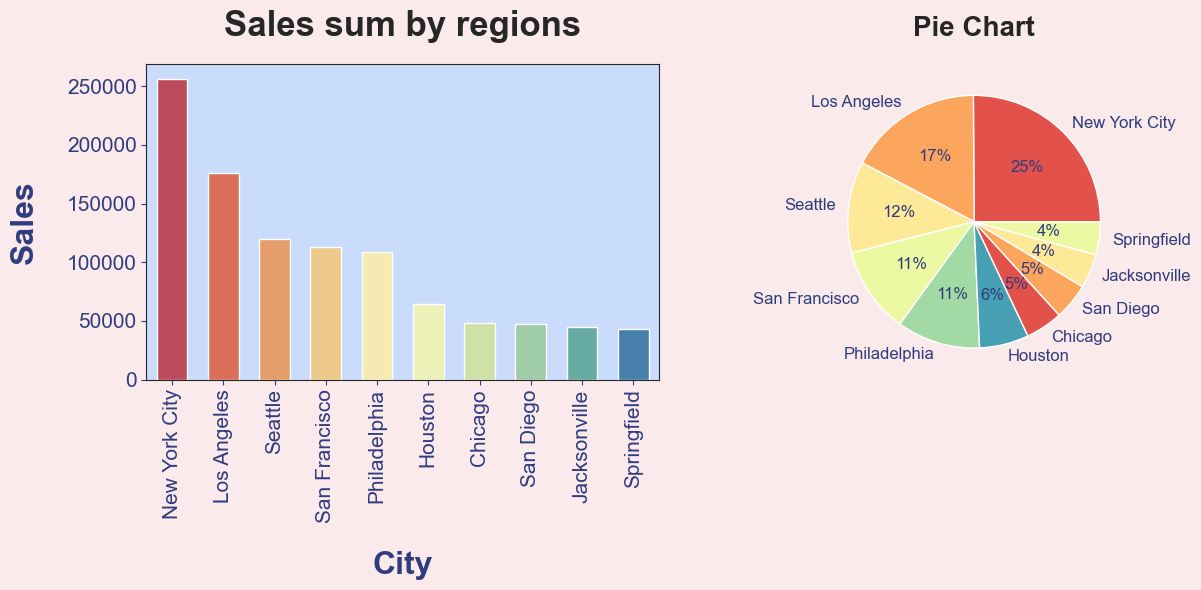

In [91]:
aa.region_sales(operator='sum')

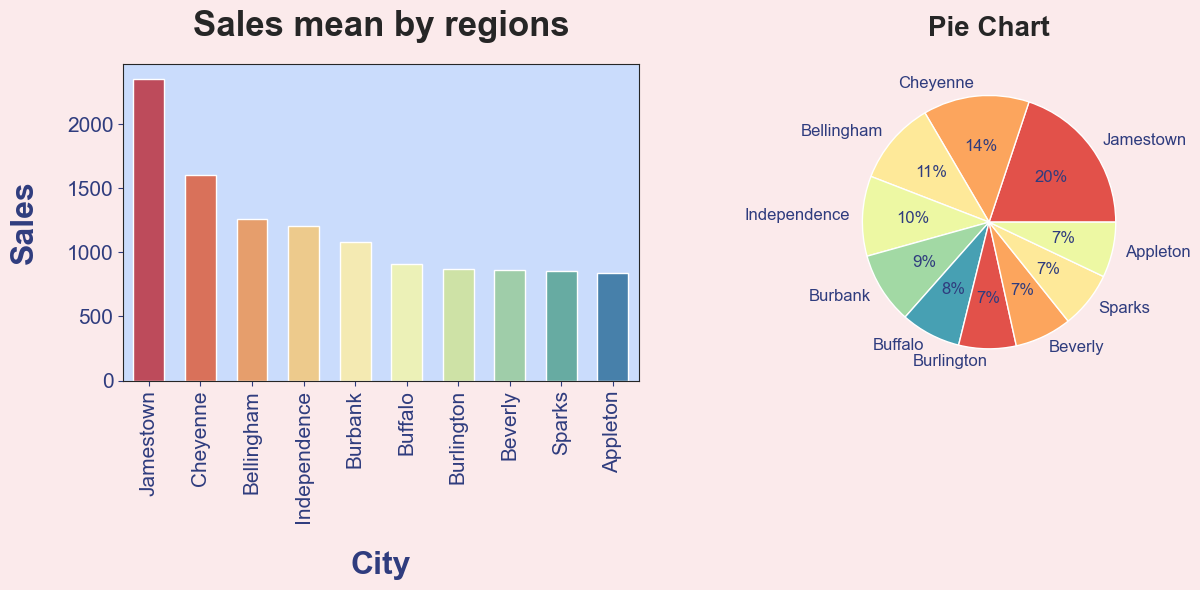

In [92]:
aa.region_sales(operator='mean')

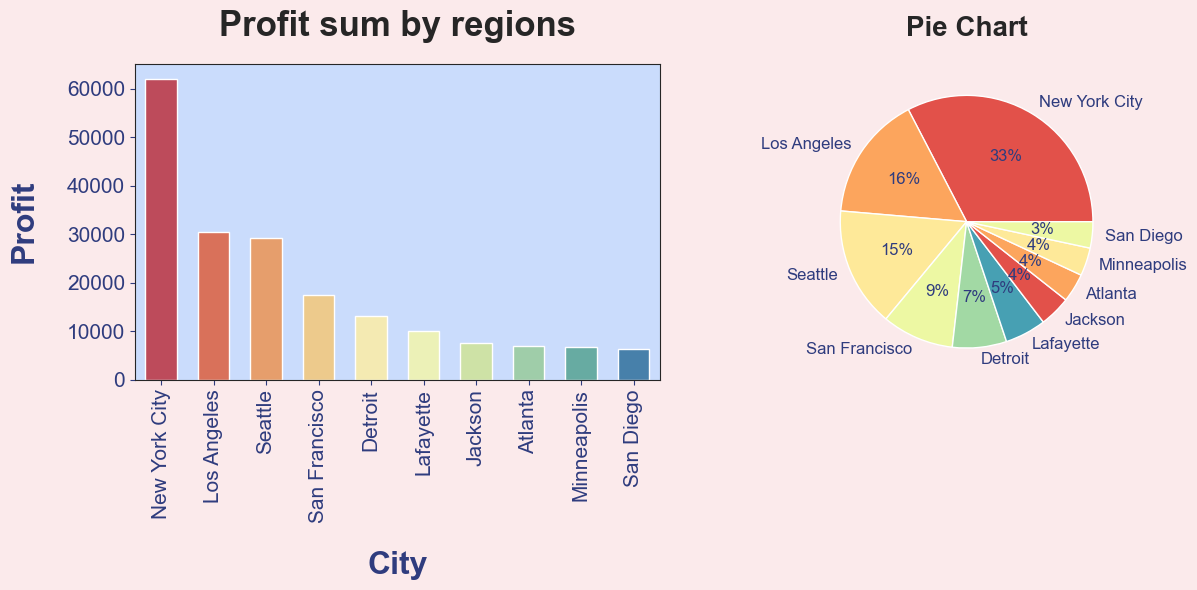

In [93]:
aa.region_profit(operator='sum')

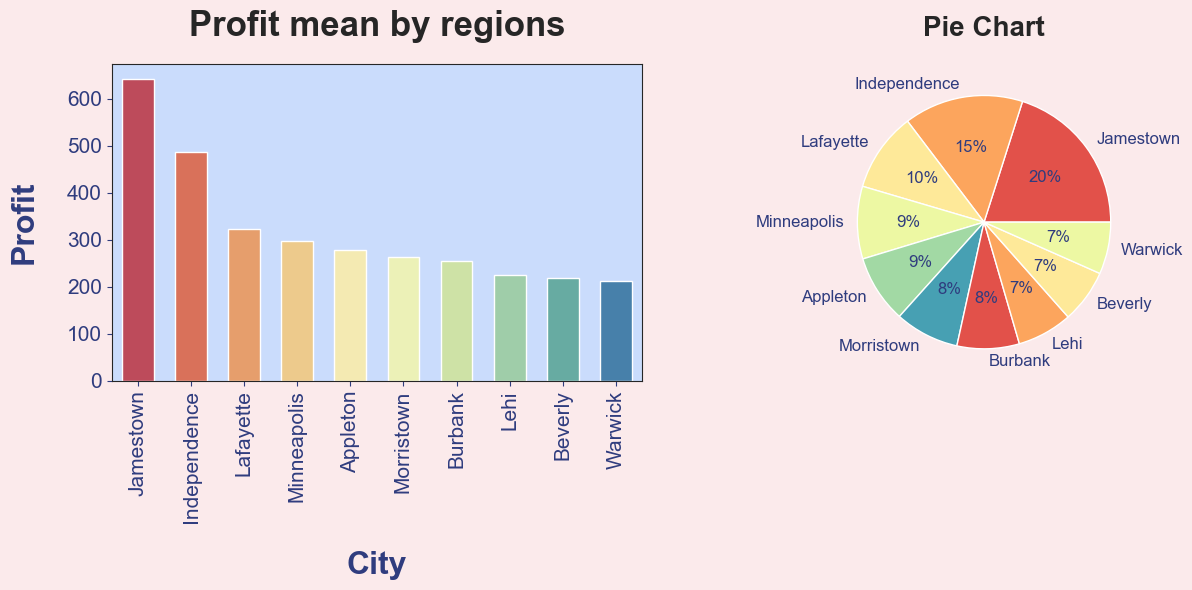

In [94]:
aa.region_profit(operator='mean')

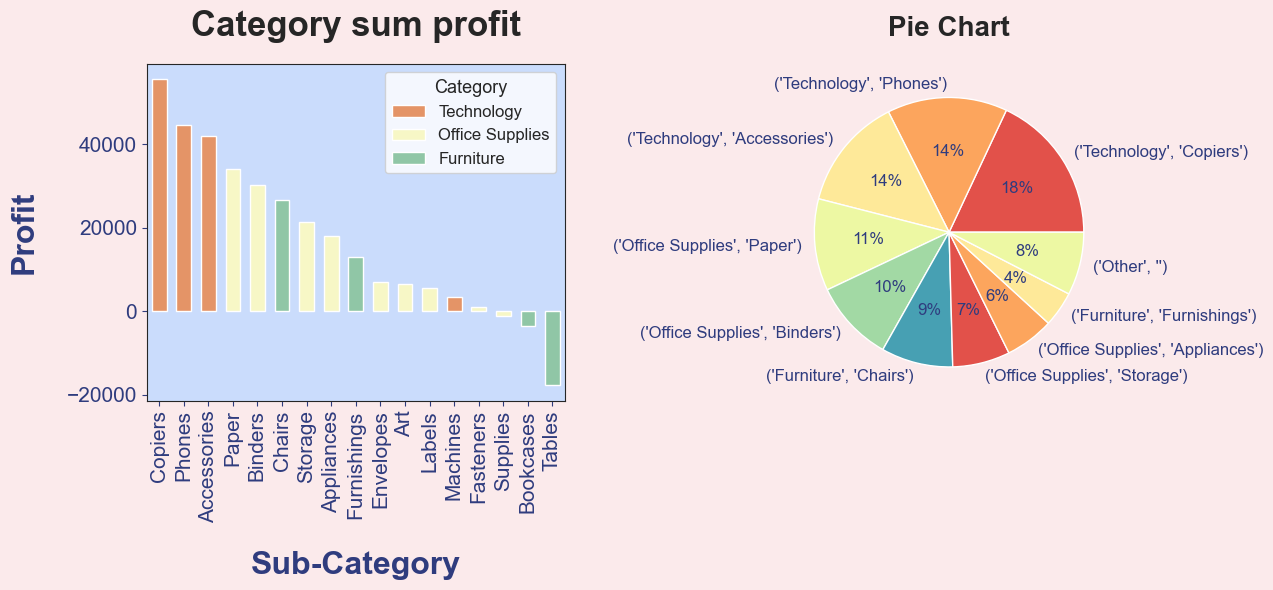

In [95]:
aa.most_popular_categories_profit(operator='sum')

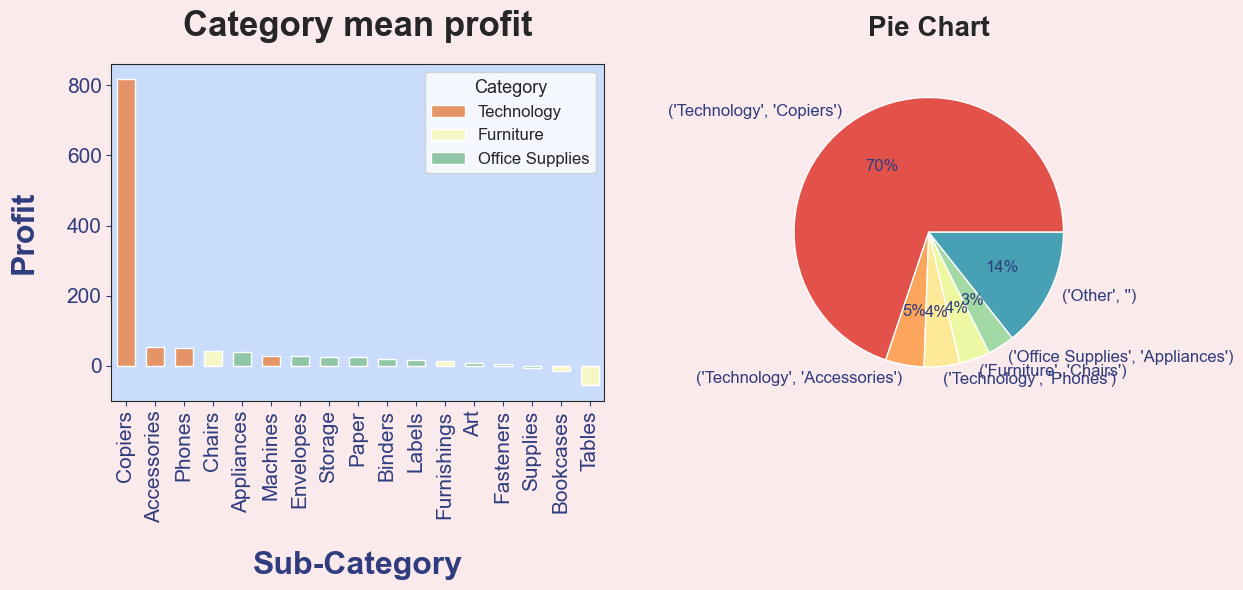

In [96]:
aa.most_popular_categories_profit(operator='mean')

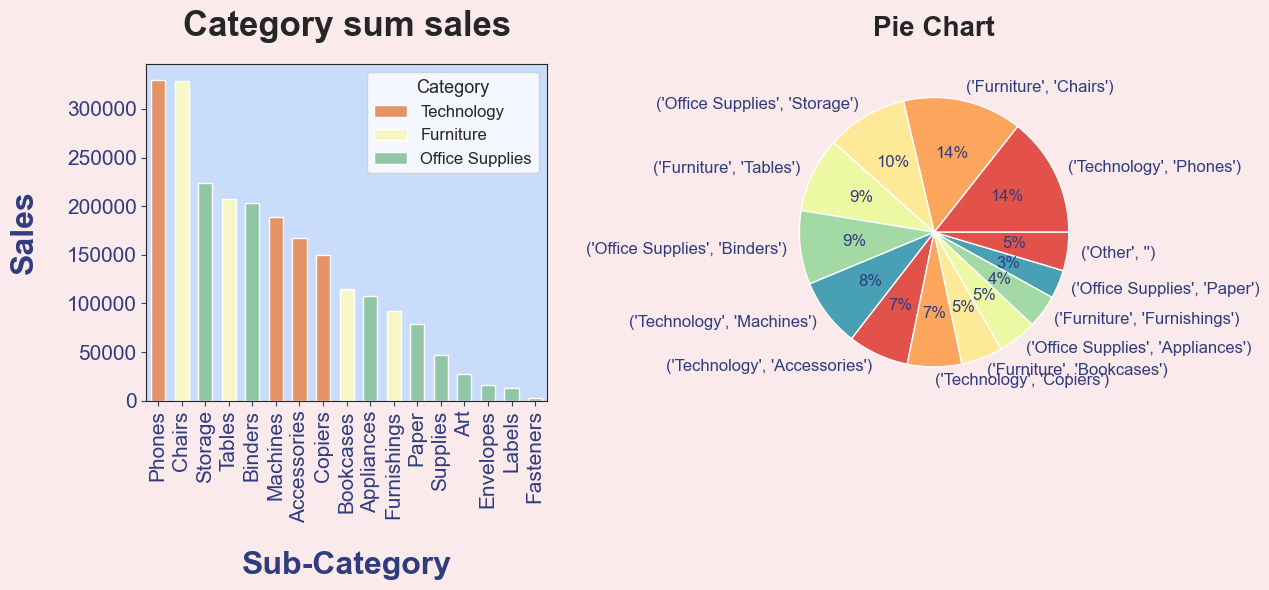

In [97]:
aa.most_popular_categories_sales(operator='sum')

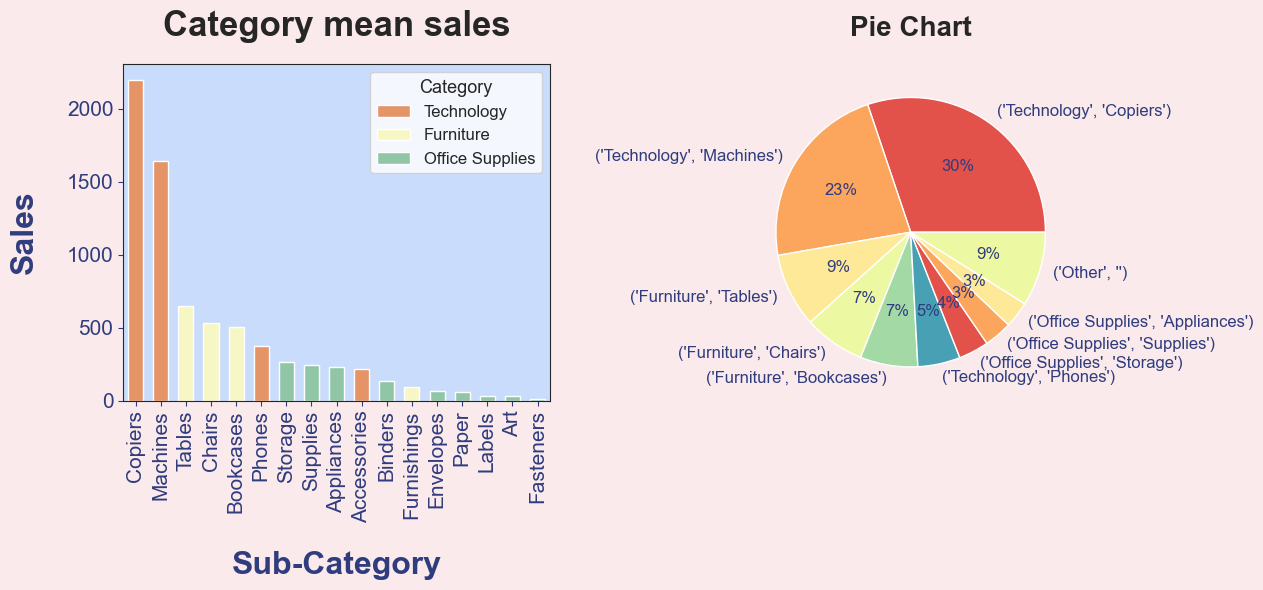

In [98]:
aa.most_popular_categories_sales(operator='mean')

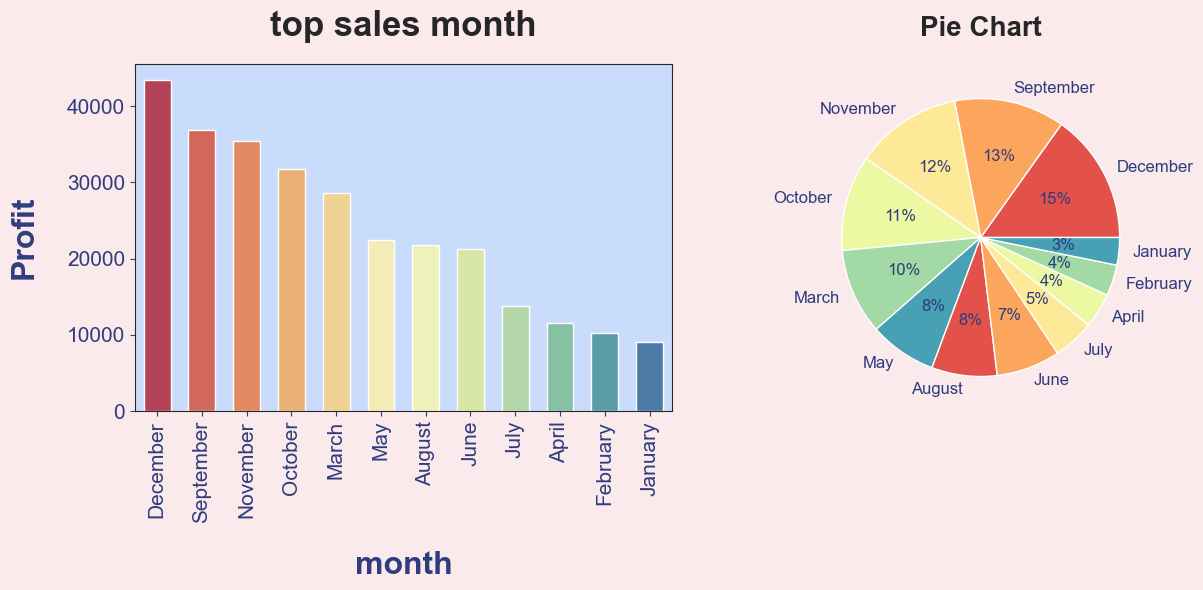

In [99]:
aa.top_month_profit

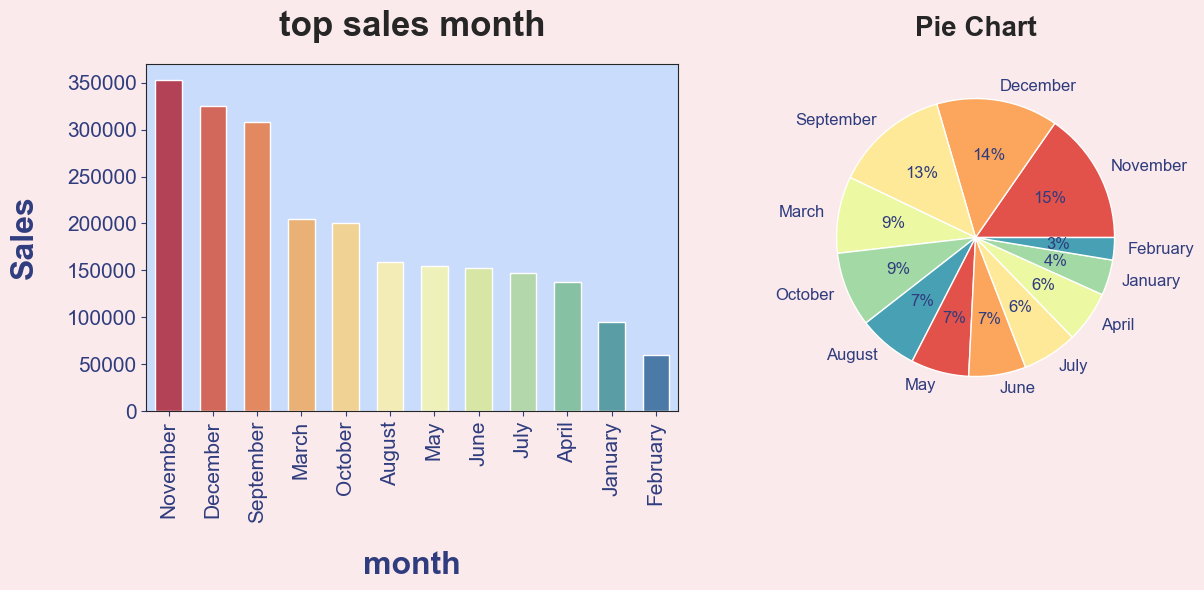

In [100]:
aa.top_month_sales

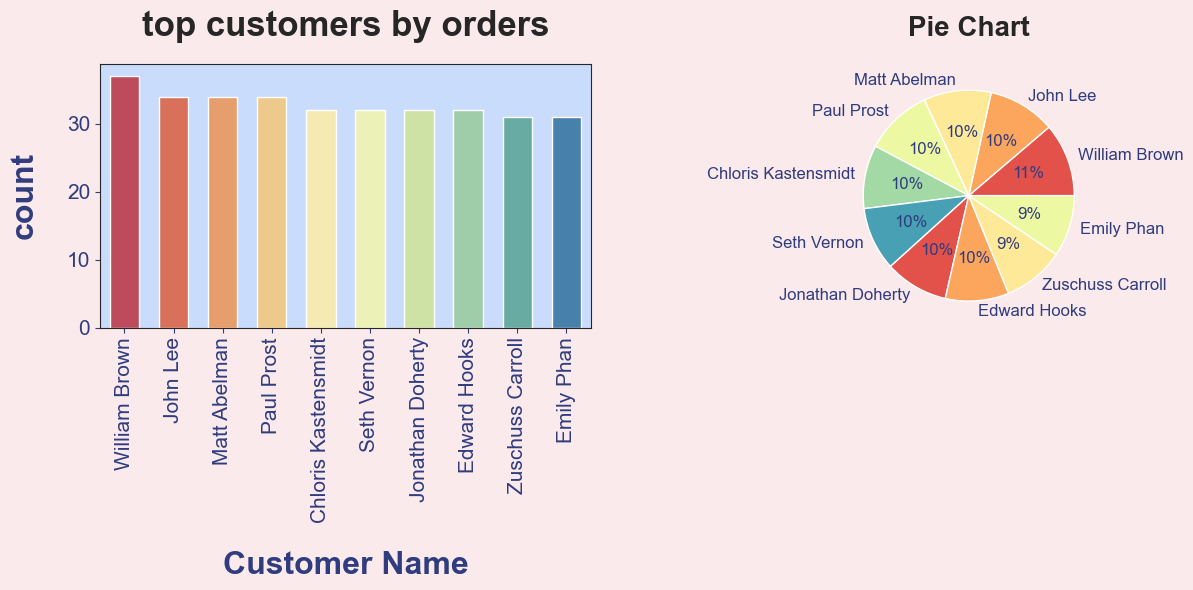

In [101]:
aa.top_customers()

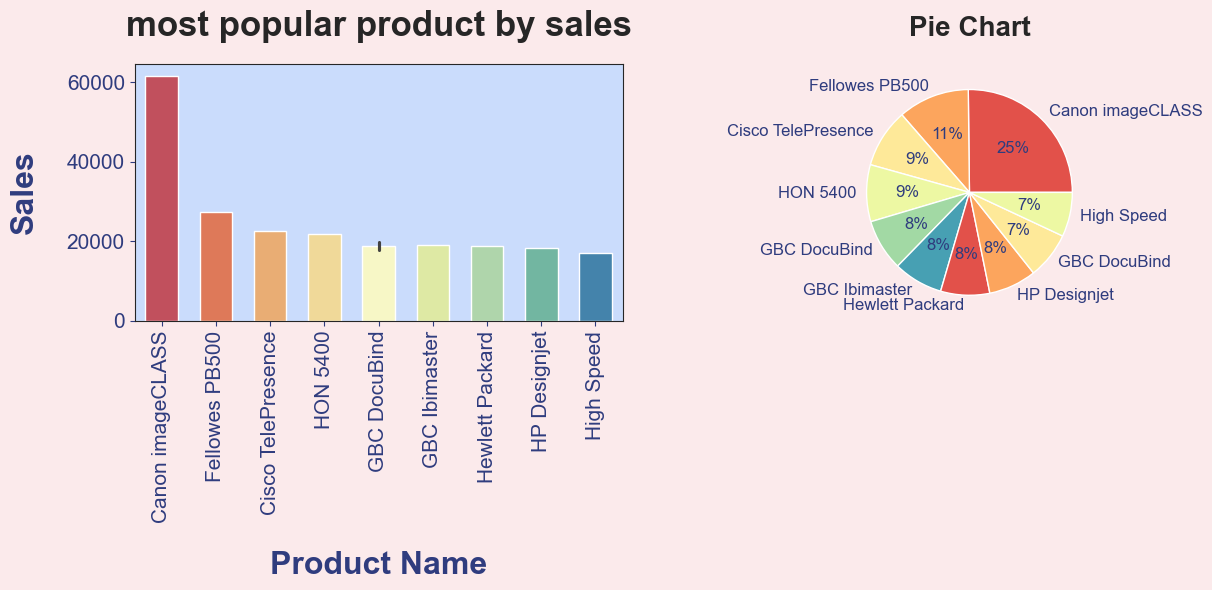

In [102]:
aa.most_popular_products_sales()

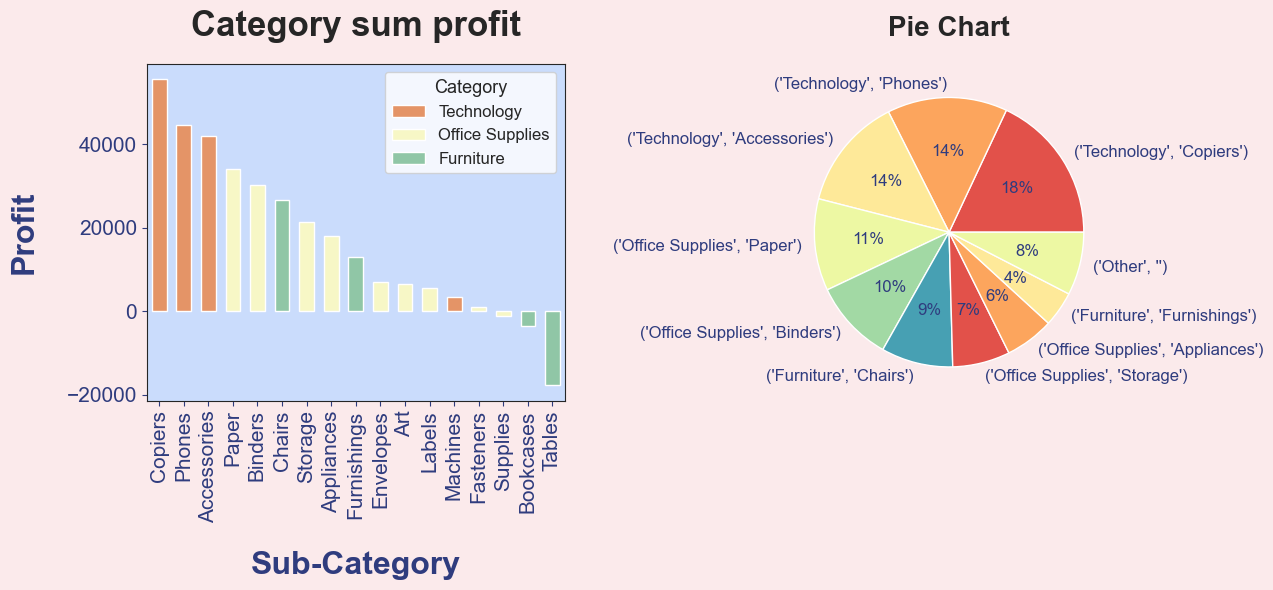

In [103]:
aa.most_popular_categories_profit()

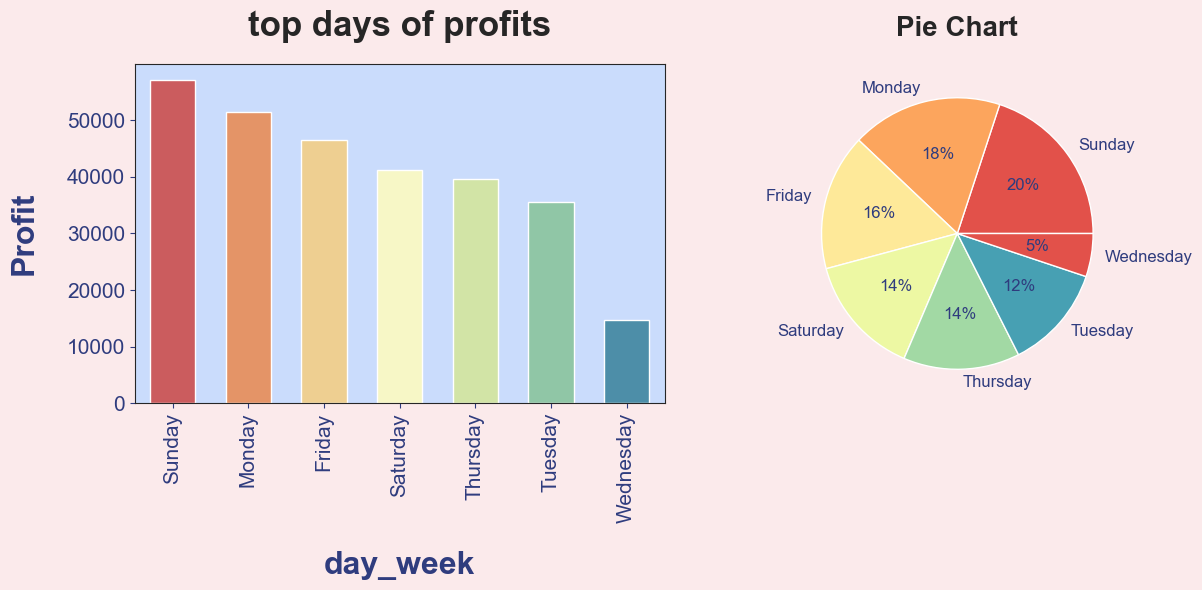

In [104]:
aa.day_of_week_profit

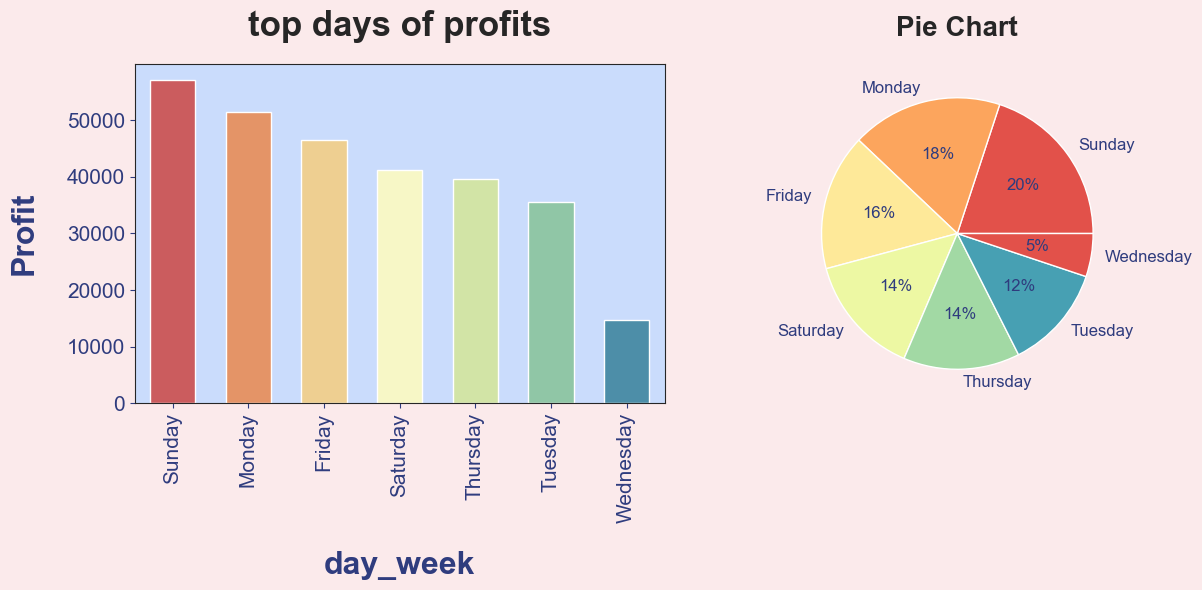

In [105]:
aa.day_of_week_profit

In [47]:
aa.state_map

100%|██████████| 531/531 [08:52<00:00,  1.00s/it]


<Figure size 1000x600 with 0 Axes>

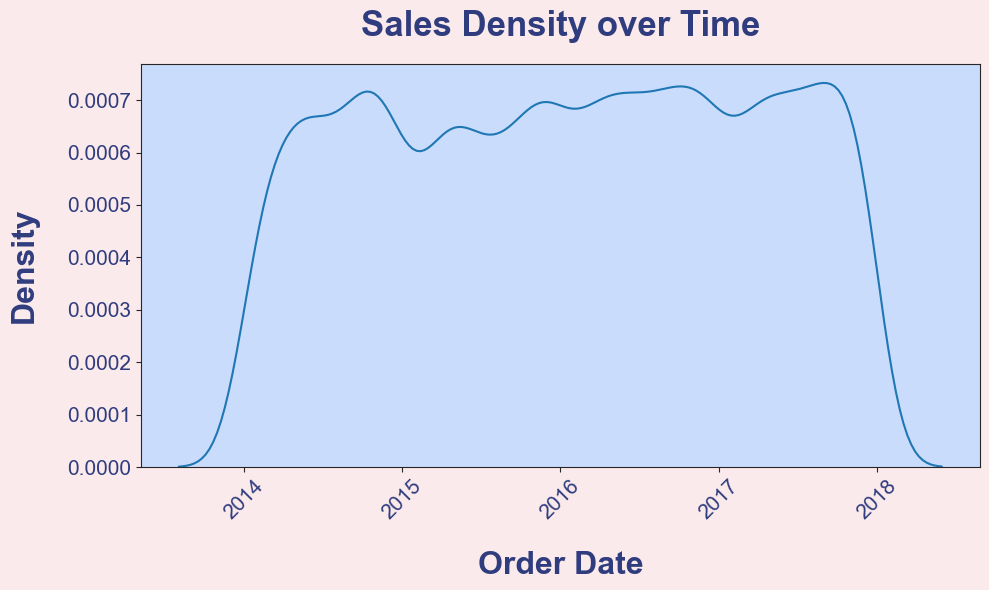

In [79]:
aa.plot_orders